# Analyze of paper
References:

Cheon, J. H., Kim, D., and Kim, D. Efficient homomorphic comparison methods with optimal complexity. pp.
221–256, 2020. doi: 10.1007/978-3-030-64834-3_8.
https://eprint.iacr.org/2019/1234.pdf

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
def approximation_metrics(y_true, y_approx, rnd=4, min_round=1e-4):
    mse = np.mean((y_true - y_approx)**2)
    mae = np.mean(np.abs(y_true - y_approx))
    max_error = np.max(np.abs(y_true - y_approx))
    min_error = np.min(np.abs(y_true - y_approx))
    return {
        'MSE': round(mse, rnd),
        'MAE': round(mae, rnd),
        'MaxError': round(max_error, rnd),
        'MinError': max(min_error, min_round),
        }

In [11]:
metrics_df = pd.DataFrame(
    columns=['MSE', 'MAE', 'MaxError', 'MinError']
)

## Tanh approach

Metrics: {'MSE': np.float64(0.0009), 'MAE': np.float64(0.0021), 'MaxError': np.float64(0.4621), 'MinError': 0.0001}


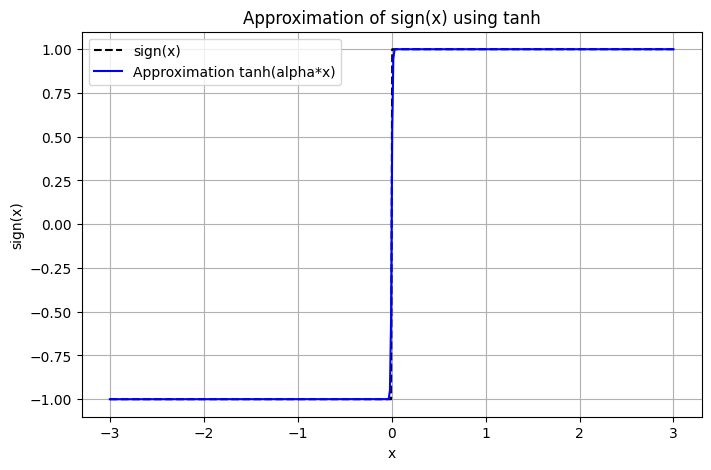

In [12]:
# Аппроксимация sign через гиперболический тангенс
def approx_sign(x, alpha=5):
    return np.tanh(alpha * x)

# Диапазон значений
x = np.linspace(-3, 3, 500)
y_true = np.sign(x)
y_approx = approx_sign(x, alpha=100)


metrics = approximation_metrics(y_true, y_approx)
print(f"Metrics: {metrics}")
metrics_df.loc["Tanh"] = metrics.values()

# Визуализация
plt.figure(figsize=(8,5))
plt.plot(x, y_true, label='sign(x)', color='black', linestyle='--')
plt.plot(x, y_approx, label='Approximation tanh(alpha*x)', color='blue')
plt.title('Approximation of sign(x) using tanh')
plt.xlabel('x')
plt.ylabel('sign(x)')
plt.grid(True)
plt.legend()
plt.show()


## Чебышева

Metrics: {'MSE': np.float64(0.0031106759619763053), 'MaxError': np.float64(0.8714878815614262)}


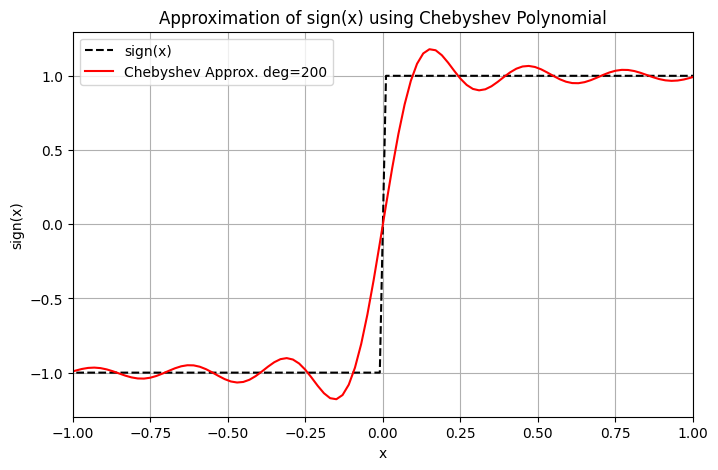

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.chebyshev import Chebyshev

# Функция для вычисления метрик аппроксимации
def approximation_metrics(y_true, y_pred):
    error = np.abs(y_true - y_pred)
    mse = np.mean(error**2)
    max_err = np.max(error)
    return {"MSE": mse, "MaxError": max_err}

# Параметры
degree = 200  # степень Chebyshev-полинома
interval = [-10, 10]  # интервал аппроксимации

# Определяем функцию sign(x)
# def sign_function(x):
#     return 1.5 * np.sign(x - 0.5)
def sign_function(x):
    return np.sign(x)
# def sign_function(x):
#     x = np.asarray(x)
#     return np.where((x > 1.5) | (x < -0.5), 1, 0)

# Строим Chebyshev-полином, аппроксимирующий sign(x)
# np.polynomial.chebyshev.chebfit работает на [-1,1], поэтому нормализуем вход
x_fit = np.linspace(interval[0], interval[1], 1000)
y_fit = sign_function(x_fit)

cheb_coeffs = Chebyshev.fit(x_fit, y_fit, deg=degree, domain=interval)
y_approx = cheb_coeffs(x_fit)

# Метрики
y_true = sign_function(x_fit)
metrics = approximation_metrics(y_true, y_approx)
print(f"Metrics: {metrics}")

# Визуализация
plt.figure(figsize=(8,5))
plt.plot(x_fit, y_true, label='sign(x)', color='black', linestyle='--')
plt.plot(x_fit, y_approx, label=f'Chebyshev Approx. deg={degree}', color='red')
plt.title('Approximation of sign(x) using Chebyshev Polynomial')
plt.xlabel('x')
plt.ylabel('sign(x)')
plt.grid(True)
plt.xlim(-2, 2)
plt.legend()
plt.show()


## Paper approach (fix-coef Polynomials approx)

In [14]:
# Определяем полином f4
def f4(x):
    return (35/128)*x**9 - (180/128)*x**7 + (378/128)*x**5 - (420/128)*x**3 + (315/128)*x

# Композиция d‑раз
def compose_f(x, d):
    y = x
    for _ in range(d):
        y = f4(y)
    return y

### Approx3d

Metrics: {'MSE': np.float64(0.025000575464674376), 'MaxError': np.float64(0.9850819901513528)}


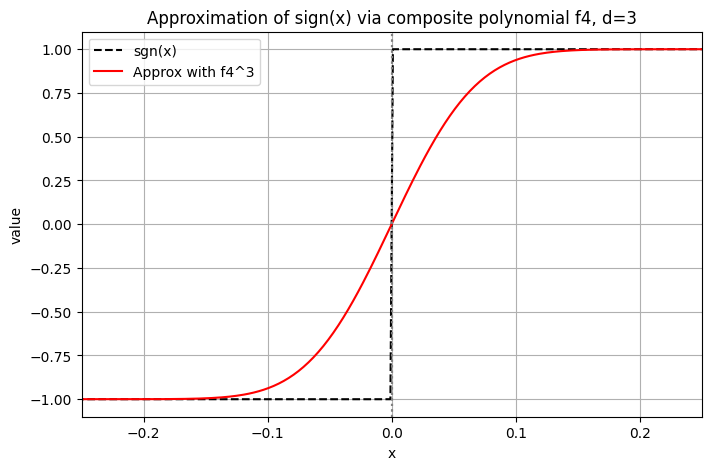

In [25]:
# Диапазон значений
x = np.linspace(-1, 1, 1000)
y_true = np.sign(x)
# Избегаем x≈0 область ­ запрещена/неприменима части
epsilon = 0
mask = (np.abs(x) >= epsilon)

# Аппроксимация
d = 3  # например, 3 композиции
y_approx = compose_f(x, d)

metrics = approximation_metrics(y_true, y_approx)
print(f"Metrics: {metrics}")
# metrics_df.loc["Approx3comp"] = metrics.values()

# Визуализация
plt.figure(figsize=(8,5))
plt.plot(x[mask], y_true[mask], label='sgn(x)', color='black', linestyle='--')
plt.plot(x[mask], y_approx[mask], label=f'Approx with f4^{d}', color='red')
plt.axvline(-epsilon, color='gray', linestyle=':')
plt.axvline(epsilon, color='gray', linestyle=':')
plt.title(f'Approximation of sign(x) via composite polynomial f4, d={d}')
plt.xlabel('x')
plt.ylabel('value')
plt.xlim(-0.25, 0.25)
plt.grid(True)
plt.legend()
plt.show()


### Approx5d

Metrics: {'MSE': np.float64(0.00410116313639535), 'MaxError': np.float64(0.9098421693392253)}


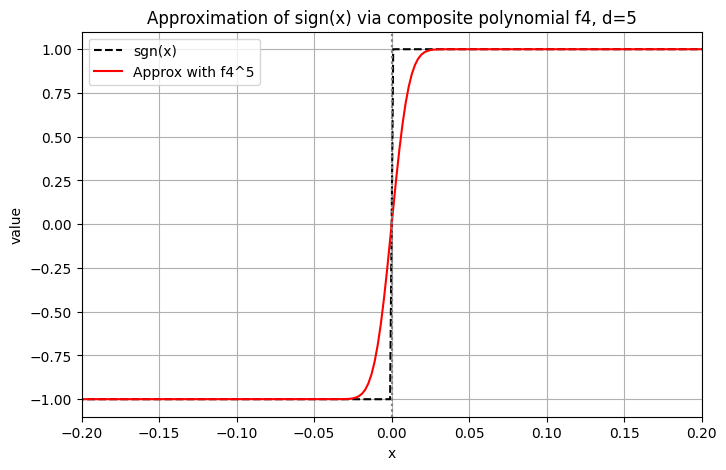

In [28]:
# Диапазон значений
x = np.linspace(-1, 1, 1000)
y_true = np.sign(x)
# Избегаем x≈0 область ­ запрещена/неприменима части
epsilon = 0
mask = (np.abs(x) >= epsilon)

# Аппроксимация
d = 5
y_approx = compose_f(x, d)

metrics = approximation_metrics(y_true, y_approx)
print(f"Metrics: {metrics}")
# metrics_df.loc["Approx5comp"] = metrics.values()

# Визуализация
plt.figure(figsize=(8,5))
plt.plot(x[mask], y_true[mask], label='sgn(x)', color='black', linestyle='--')
plt.plot(x[mask], y_approx[mask], label=f'Approx with f4^{d}', color='red')
plt.axvline(-epsilon, color='gray', linestyle=':')
plt.axvline(epsilon, color='gray', linestyle=':')
plt.title(f'Approximation of sign(x) via composite polynomial f4, d={d}')
plt.xlabel('x')
plt.ylabel('value')
plt.xlim(-0.2, 0.2)
plt.grid(True)
plt.legend()
plt.show()


## General

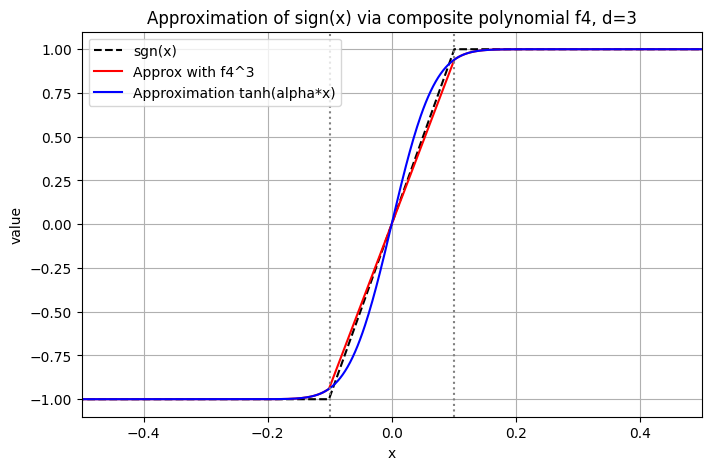

In [ ]:
# Визуализация
plt.figure(figsize=(8,5))
plt.plot(x[mask], y_true[mask], label='sgn(x)', color='black', linestyle='--')
plt.plot(x[mask], y_approx[mask], label=f'Approx with f4^{d}', color='red')
plt.plot(x, y_approx, label='Approximation tanh(alpha*x)', color='blue')
plt.axvline(-epsilon, color='gray', linestyle=':')
plt.axvline(epsilon, color='gray', linestyle=':')
plt.title(f'Approximation of sign(x) via composite polynomial f4, d={d}')
plt.xlabel('x')
plt.ylabel('value')
plt.xlim(-0.5, 0.5)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
metrics_df

,MSE,MAE,MaxError,MinError
Aar,0.0257,0.0461,0.9699,0.0001
Tanh,0.0257,0.0461,0.9699,0.0001
Approx3comp,0.0250,0.0427,0.9851,0.0001
